## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número:

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das tarefas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.


<hr style="border:2px solid black"> </hr>


In [121]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Tarefa 1:
## a) Gere 5000 (5 mil) pontos a duas dimensões, em que a primeira dimensão é uma variável aleatória Gaussina de média 2 e variância 3, e em que a segunda dimensão é uma variável aleatória uniformemente distribuída entre $[-1, 3]$. Os pontos gerados deverão estar num matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

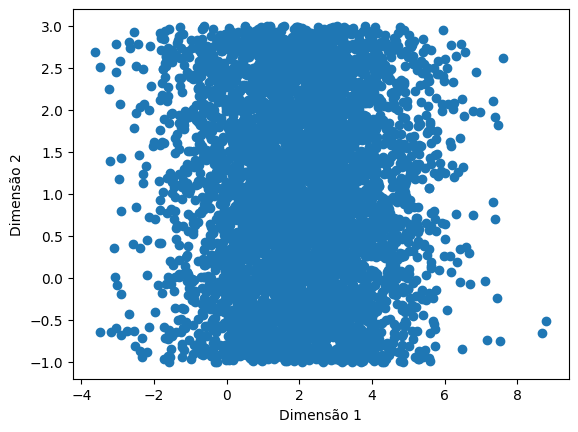

In [122]:
Npoints = 5000
a1 = rd.randn(Npoints)*np.sqrt(3)+2
a2 = rd.rand(Npoints)*4-1

X = np.vstack((a1,a2))
plt.scatter(X[0], X[1])
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.show()

 Tarefa 2:
## a) Através duma transformação matricial do tipo $X2=A\times X+b$ ($A$ matriz de $2\times2$, $b$ vetor de $2\times1$), transforme os dados de modo a estes terem média nula e matriz de covariância igual à matriz de identidade (de notar que a variância da primeira e da segunda dimensão de $X$ são 3 e 4/3, respetivamente).
## b) Através duma transformação matricial do tipo $X3=C\times X2$ ($C$ matriz de $2\times2$), transforme os dados de modo a estes terem a matriz de covariância $\Sigma=\begin{bmatrix}2.5&1\\1&0.5\end{bmatrix}$.
## c) Visualize os pontos gerados (matriz $X3$). Vizualise igualmente no mesmo gráfico os pontos da alínea anterior (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

a)
Covariância de X2--> [[ 0.99297205 -0.00504236]
 [-0.00504236  0.97840913]]
Média de X2 --> 1.0042024284249262
C--> [[1.5 0.5]
 [0.5 0.5]]
X3--> [[ 0.23550364 -0.67938172  0.9685478  ...  5.13240669  0.69630965
  -1.09303478]
 [-0.31591105 -0.59581796  0.26615872 ...  1.96479595 -0.16642708
  -0.29966972]]
Covariância X3 --> [[2.5 1. ]
 [1.  0.5]]
c)


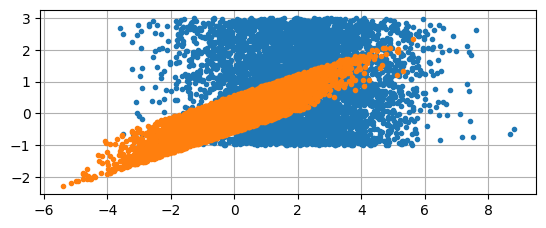

In [123]:
print('a)')
A = np.diag(np.sqrt([1/3,3/4]))
X2 = np.dot(A,X)
print('Covariância de X2-->', np.cov(X2))
print('Média de X2 -->', np.mean(X2))
b=np.array([-1.1,-0.9])
X2 = (X2.T+b).T
C = np.array([[2.5,1],[1,0.5]])
C = la.sqrtm(C)
X3 = np.dot(C,X2)
print('C-->',C)
print('X3-->',X3)
print('Covariância X3 -->',np.round(np.cov(X3),1))
print('c)')
plt.plot(X[0],X[1],'.',label='X')
plt.plot(X3[0],X3[1],'.',label='X3')
plt.axis('scaled')
plt.grid()

# Tarefa 3:
## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.

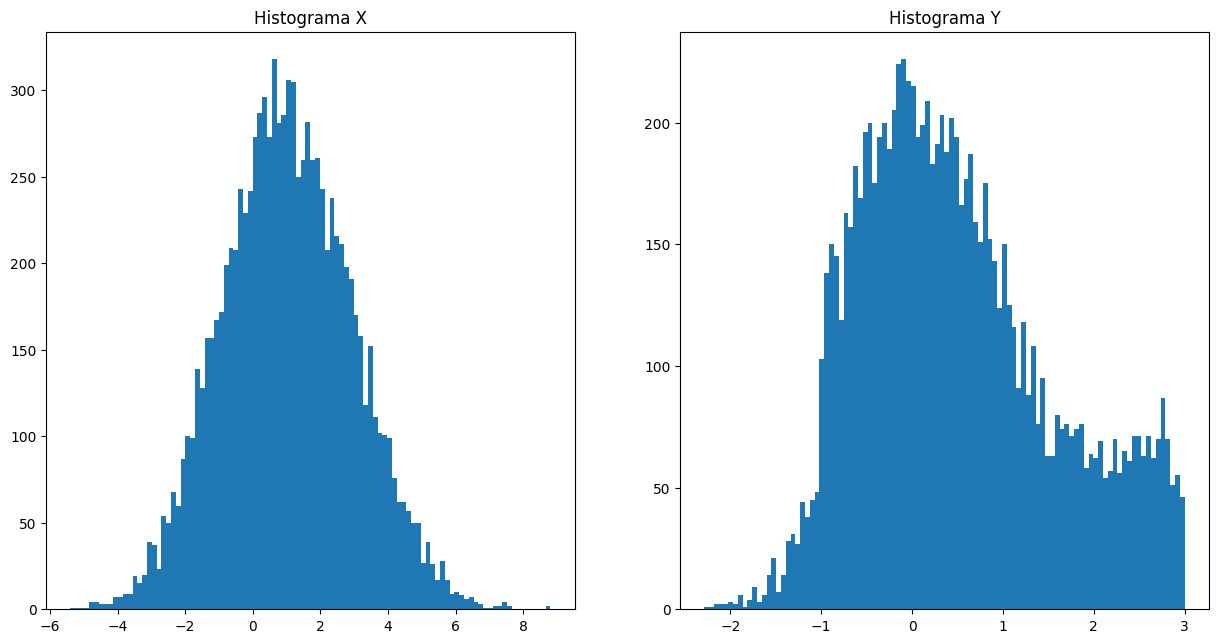

In [124]:
N1 = 10000
X4 = np.hstack((X,X3))
hx,b = np.histogram(X4,np.linspace(0,1,101),density=True)
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.hist(X4[0],bins=100)
plt.title('Histograma X')
plt.subplot(1,2,2)
plt.hist(X4[1],bins=100)
plt.title('Histograma Y')
plt.show()